第0次迭代，成本值为：0.8830537463419761
第1000次迭代，成本值为：0.6879825919728063
第2000次迭代，成本值为：0.6751286264523371
第3000次迭代，成本值为：0.6526117768893807
第4000次迭代，成本值为：0.6082958970572938
第5000次迭代，成本值为：0.5304944491717495
第6000次迭代，成本值为：0.4138645817071794
第7000次迭代，成本值为：0.3117803464844441
第8000次迭代，成本值为：0.23696215330322562
第9000次迭代，成本值为：0.18597287209206836
第10000次迭代，成本值为：0.15015556280371817
第11000次迭代，成本值为：0.12325079292273552
第12000次迭代，成本值为：0.09917746546525932
第13000次迭代，成本值为：0.08457055954024274
第14000次迭代，成本值为：0.07357895962677362


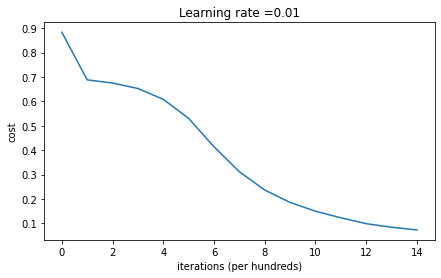

训练集：
Accuracy: 0.9933333333333333
测试集：
Accuracy: 0.96
predictions_train = [[1 0 1 1 0 0 1 0 1 1 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 1 1 0 1 1 0 0 0
  0 1 0 1 1 1 1 0 0 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 0 1 0 1 0 1 0 1 1 0
  0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 1 0 1 0 0 1 0 1 1 0
  0 0 1 1 0 0 1 0 0 1 0 0 1 1 1 0 0 0 0 1 0 1 1 0 1 1 1 1 0 1 1 0 0 0 0 0
  0 0 1 0 1 0 1 0 1 1 1 0 0 1 1 0 1 0 1 1 0 1 0 1 1 0 1 1 1 1 0 1 0 0 1 0
  1 0 0 0 1 0 1 1 1 0 0 1 1 0 0 1 0 1 0 0 1 0 1 1 0 1 1 1 1 0 1 0 1 0 0 1
  0 1 0 0 0 1 1 1 1 0 1 0 0 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 1 1 0 1 0
  1 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 1 1 0 0 1 1 1 1
  1 1 1 0 0 0 0 1 1 0 1 0]]
predictions_test = [[1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 1 1 0 1 0 0 1
  0 1 1 0 0 1 1 1 1 0 0 0 1 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0
  1 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0]]


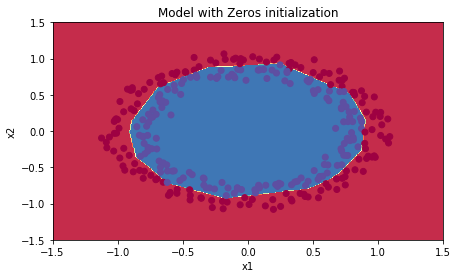

In [2]:
"""
目的：
初始化参数
正则化模型
梯度校验
"""    
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import init_utils
#初始化
import reg_utils
#正则化
import gc_utils
#梯度校验

%matplotlib inline

plt.rcParams['figure.figsize'] = (7.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

train_X, train_Y, test_X, test_Y = init_utils.load_dataset(is_plot = False)

#三种初始化方式
#初始化为0
#初始化为随机数
#初始化为he 梯度爆炸or梯度消失

def model(X, Y, learning_rate = 0.01, num_interation = 15000, print_cost = False, initalization = "he", is_plot = False):
    """
    功能：
    三层神经网络：[linear->relu]->[linear->relu]->[linear->sigmoid]
    参数：
    X:输入的数据，维度(n_x = 2, m)
    Y:标签，维度(1, m)
    learning_rate:学习速率
    num_iterations:迭代次数
    print_cost:是否打印成本值
    initialization:初始化类型
    is_plot:是否画出
    返回值：
    parameters：神经网络的参数
    
    """
    grads = {}
    costs = []
    m = X.shape[1]
    
    layer_dims = [X.shape[0], 10 ,5, 1]
    #设计神经网络层数
    
    #初始化参数
    if initalization == "zeros":
        paramaters = initalize_paramaters_zeros(layer_dims)
    elif initalization == "random":
        paramaters = initalize_paramaters_random(layer_dims)
    elif initalization == "he":
        paramaters = initalize_paramaters_he(layer_dims)
    else:
        print("初始化错误")
        exit
    
    #迭代次数
    for i in range(0, num_interation):
        #前向传播
        a3, cache = init_utils.forward_propagation(X, paramaters)
        
        #计算成本
        cost = init_utils.compute_loss(a3, Y)
        
        #反向传播
        grads = init_utils.backward_propagation(X, Y, cache)
        
        #更新参数
        paramaters = init_utils.update_parameters(paramaters, grads, learning_rate)
        
        #每1000次打印一次成本
        if i % 1000 == 0:
            costs.append(cost)
            
            if print_cost:
                print("第" + str(i) + "次迭代，成本值为：" + str(cost))
    #画图
    if is_plot:
        plt.plot(costs)
        plt.ylabel('cost')
        plt.xlabel('iterations (per hundreds)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()
    
    return paramaters

def initalize_paramaters_zeros(layer_dims):
    """
    功能：
    将模型参数初始化为0
    
    参数：
    layer_dims:神经网络具体层数
    
    返回值：
    parameters:神经网络参数
    
    """
    paramaters = {}
    
    L = len(layer_dims)
    
    for l in range(1, L):
        paramaters["W" + str(l)] = np.zeros((layer_dims[l], layer_dims[l-1]))
        paramaters["b" + str(l)] = np.zeros((layer_dims[l], 1))
        
        assert(paramaters["W" + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(paramaters["b" + str(l)].shape == (layer_dims[l], 1))
    return paramaters

#parameters = model(train_X, train_Y, learning_rate = 0.01, num_interation = 3000, print_cost = True, initalization = "zeros", is_plot = True)

def initalize_paramaters_random(layer_dims):
    """
    功能：
    将模型参数随机初始化
    
    参数：
    layer_dims:神经网络具体层数
    
    返回值：
    parameters:神经网络参数
    
    """
    np.random.seed(3)
    
    paramaters = {}
    
    L = len(layer_dims)
    
    for l in range(1, L):
        paramaters["W" + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * 10
        paramaters["b" + str(l)] = np.zeros((layer_dims[l], 1))
        
        assert(paramaters["W" + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(paramaters["b" + str(l)].shape == (layer_dims[l], 1))
    return paramaters

#parameters = model(train_X, train_Y, learning_rate = 0.01, num_interation = 15000, print_cost = True, initalization = "random", is_plot = True)

def initalize_paramaters_he(layer_dims):
    """
    功能：
    将模型参数抑制度初始化
    
    参数：
    layer_dims:神经网络具体层数
    
    返回值：
    parameters:神经网络参数
    """
    np.random.seed(3)
    
    paramaters = {}
    
    L = len(layer_dims)
    
    for l in range(1, L):
        paramaters["W" + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * np.sqrt(2 / layer_dims[l-1])
        paramaters["b" + str(l)] = np.zeros((layer_dims[l], 1))
        
        assert(paramaters["W" + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(paramaters["b" + str(l)].shape == (layer_dims[l], 1))

    return paramaters

parameters = model(train_X, train_Y, learning_rate = 0.01, num_interation = 15000, print_cost = True, initalization = "he", is_plot = True)


print("训练集：")
predictions_train = init_utils.predict(train_X, train_Y, parameters) 
print("测试集：")
predictions_test = init_utils.predict(test_X, test_Y, parameters)

print("predictions_train = " + str(predictions_train))
print("predictions_test = " + str(predictions_test))

plt.title("Model with Zeros initialization")
axes = plt.gca()
axes.set_xlim([-1.5, 1.5])
axes.set_ylim([-1.5, 1.5])
init_utils.plot_decision_boundary(lambda x: init_utils.predict_dec(parameters, x.T), train_X, train_Y)
